# Of all NON-renewable energy types, which have seen the most growth over five years?
### Data source: data.UN.org Energy Statistics Database

## i.Data Cleansing

### i.a. Combining & Merging

#### I used the 'unique' function to find out which variables in this dataset are useful, and found "Final consumption" to be a good place to start for each energy type.

#### All of the energy types are in separate csv files but have the same column headers, so they are easy to merge using the map function.

In [134]:
#combining all datasets in the nonrenewables file using map function

import glob
import pandas as pd 

df = pd.concat(map(pd.read_csv, glob.glob('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/raw_data_nonrenewable/*.csv')))
df.rename(columns={'Country or Area':'Geo'}, inplace=True)

#split commodity and transaction into two columns
#defining column to split and which delimiter
ct = df['Commodity - Transaction'].str.split('-')

#assigning new columns
df['Commodity'] = ct.str.get(0)
df['Transaction'] = ct.str.get(1)

#lowercase and remove trailing and leading spaces
df['Commodity'] = df['Commodity'].str.lower()
df['Commodity'] = df['Commodity'].str.strip()

df['Transaction'] = df['Transaction'].str.lower()
df['Transaction'] = df['Transaction'].str.strip()

df = df[df['Transaction'] == 'final consumption']




In [135]:
import pandas as pd 
unit_conv = pd.read_csv('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/renewable_energy_units_conv_2.csv')

In [136]:
df_merge = pd.merge(df,  
                     unit_conv,  
                     on ='Commodity', 
                     how ='left') 

df_merge['TJ'] = df_merge['Quantity'] * df_merge['Conv_mt_to_tj']
df_merge.sample()

,Geo,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes,Commodity,Transaction,Description,Units,Conv_mt_to_tj,TJ
35159,Bangladesh,Motor Gasoline - Final consumption,2009.0,"Metric tons, thousand",194.0,NaN,motor gasoline,final consumption,NaN,"Metric tons, thousand",44.3,8594.2


## iv.Non-renewables Metrics 2018

In [137]:
#filter 2018, group by Commodity, sum of TJ
df_2018 = df_merge[df_merge['Year'] == 2018]
comm_grp_18 = df_2018.groupby(['Commodity'])
sum_2018 = comm_grp_18['TJ'].agg(['sum'])

#same thing for 2013

df_2013 = df_merge[df_merge['Year'] == 2013]
comm_grp_13 = df_2013.groupby(['Commodity'])
sum_2013 = comm_grp_13['TJ'].agg(['sum'])



In [138]:
#change 'sum' heading to TJ 2018, TJ 2013
sum_2018.rename(columns={'sum' : 'Total TJ 2018'}, inplace=True)
sum_2013.rename(columns={'sum' : 'Total TJ 2013'}, inplace=True)

In [139]:
#combine data frames
nonrenew_change = pd.concat([sum_2013, sum_2018], axis='columns', sort=False)

In [140]:
nonrenew_change['change'] = nonrenew_change['Total TJ 2018'] - nonrenew_change['Total TJ 2013']
nonrenew_change['perc_change'] = (nonrenew_change['change'] / nonrenew_change['Total TJ 2013']) * 100
nonrenew_change.sort_values(by='perc_change', ascending=False)

,Total TJ 2013,Total TJ 2018,change,perc_change
Commodity,,,,
oil shale,2.109300e+03,3.257400e+03,1.148100e+03,54.430380
lubricants,1.094999e+06,1.576357e+06,4.813580e+05,43.959668
natural gas liquids,2.335970e+05,3.335774e+05,9.998040e+04,42.800378
other oil products n.e.c.,3.170210e+06,4.400704e+06,1.230495e+06,38.814292
petroleum coke,2.414234e+06,3.311283e+06,8.970481e+05,37.156629
blast furnace gas,3.100425e+06,4.236203e+06,1.135777e+06,36.632955
ethane,2.828405e+06,3.780109e+06,9.517044e+05,33.648096
paraffin waxes,1.265609e+05,1.638687e+05,3.730780e+04,29.478138
gasworks gas,3.519657e+05,4.517258e+05,9.976012e+04,28.343705


AxesSubplot(0.125,0.125;0.775x0.755)


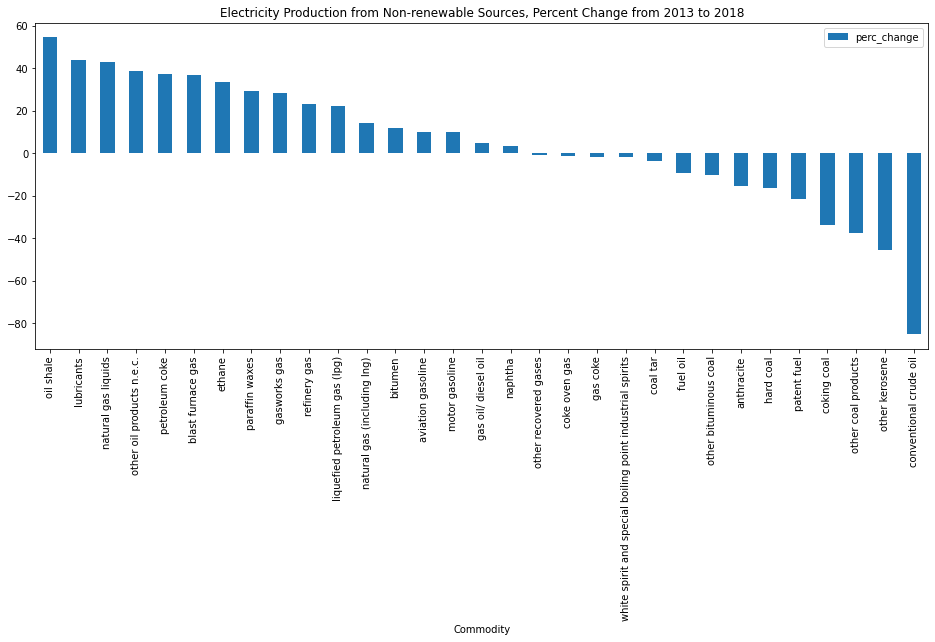

In [141]:
import matplotlib.pyplot as plt 

pc_only = nonrenew_change.drop(['Total TJ 2018', 'Total TJ 2013', 'change'],axis=1)
pc_only.sort_values(by='perc_change', ascending=False, inplace=True)


print(pc_only.plot(kind='bar', figsize=(16,6), title='Energy Production from Non-renewable Sources, Percent Change from 2013 to 2018'))

AxesSubplot(0.125,0.125;0.775x0.755)


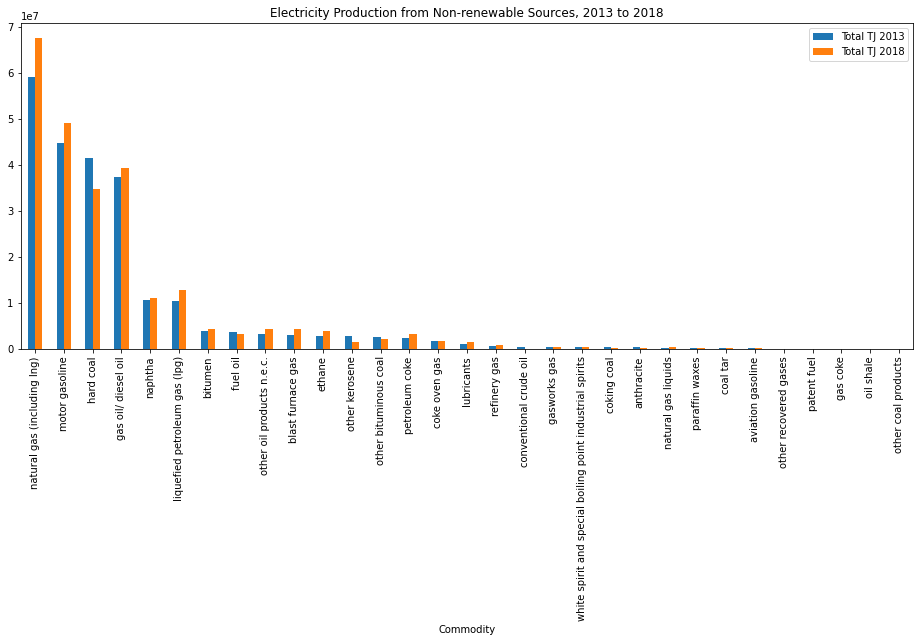

In [142]:
import matplotlib.pyplot as plt 
no_pc = nonrenew_change.drop(['change', 'perc_change'], axis=1)
no_pc.sort_values(by='Total TJ 2013', ascending=False, inplace=True)

print(no_pc.plot(kind='bar', figsize=(16,6), title='Energy Production from Non-renewable Sources (Terajoules), 2013 to 2018'))

## v.Insights